<a href="https://colab.research.google.com/github/AdrianPal00/SP-Lab1/blob/main/Reviews1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
from tensorflow import keras
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from keras.layers import Dense, Activation, Flatten, Convolution1D, Convolution2D, Dropout, MaxPooling1D,LSTM
import os
import tensorflow as tf
from keras.regularizers import l2
import warnings
import matplotlib.pyplot as plt
import random as rnd
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer


In [ ]:
'''
            ------- Amazon and Best Buy Electronics -------
This dataset presents the feedback received on the different electronic products.
The whole idea is to create neural networks predict 
Having been given different features, We want to predict weather a given brand is recommended (reviews.doRecommend = True) or a brand is not recommened (reviews.doRecommend = False)
'''

# Conditions to make sure that tensorflow GPU is up and running on machine.
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

# Reading the dataset from the csv file using panadas.
dataset = pd.read_csv('DatafinitiElectronicsProductData.csv')

# Printing the first 5 rows of the dataset
print(dataset.head())


Please install GPU version of TF
                     id       asins      brand  \
0  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
1  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
2  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
3  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
4  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   

                                          categories colors  \
0  Electronics,Computers,Computer Accessories,Key...  Black   
1  Electronics,Computers,Computer Accessories,Key...  Black   
2  Electronics,Computers,Computer Accessories,Key...  Black   
3  Electronics,Computers,Computer Accessories,Key...  Black   
4  Electronics,Computers,Computer Accessories,Key...  Black   

              dateAdded           dateUpdated                   dimension  \
0  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   
1  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   
2  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x

In [ ]:
dataset = dataset.filter(['brand','manufacturer','reviews.text','reviews.title','reviews.doRecommend'])

In [ ]:
dataset.head()

,brand,manufacturer,reviews.text,reviews.title,reviews.doRecommend
0,Microsoft,Microsoft,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,True
1,Microsoft,Microsoft,It's thin and light. I can type pretty easily ...,Nice,True
2,Microsoft,Microsoft,I love the new design the keys are spaced well...,New,True
3,Microsoft,Microsoft,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,True
4,Microsoft,Microsoft,"Our original keyboard was okay, but did not ha...",Nice improvement,True


In [ ]:
dataset.dropna(inplace=True)
X = dataset.drop('reviews.doRecommend', axis = 1)
y = dataset['reviews.doRecommend']
# X_train.head()
X = dataset['reviews.text']

cv = CountVectorizer()
t = TfidfTransformer()
X = cv.fit_transform(X)
X = t.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc
y_train, y_test = prepare_targets(y_train, y_test)

model = MultinomialNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
model = LogisticRegression(penalty="l2", solver="saga", C=100, max_iter=800).fit(X_train, y_train)
model.score(X_test, y_test)

0.8971807628524047


0.900497512437811

In [ ]:
model = MultinomialNB().fit(X_train, y_train)
model.score(X_test, y_test)

0.8971807628524047

Please install GPU version of TF
                     id       asins      brand  \
0  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
1  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
2  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
3  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   
4  AVpf3txeLJeJML43FN82  B0168YIWSI  Microsoft   

                                          categories colors  \
0  Electronics,Computers,Computer Accessories,Key...  Black   
1  Electronics,Computers,Computer Accessories,Key...  Black   
2  Electronics,Computers,Computer Accessories,Key...  Black   
3  Electronics,Computers,Computer Accessories,Key...  Black   
4  Electronics,Computers,Computer Accessories,Key...  Black   

              dateAdded           dateUpdated                   dimension  \
0  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   
1  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x 8.5 in x 0.19 in   
2  2015-11-13T12:28:09Z  2018-01-29T02:15:13Z  11.6 in x

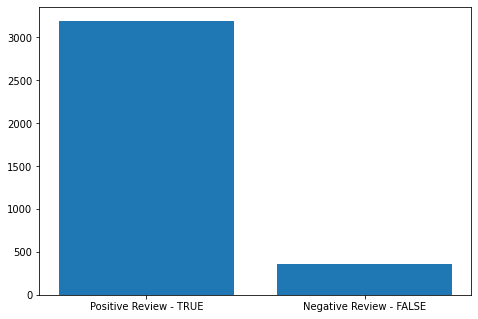

            brand                                         categories  \
0       Microsoft  Electronics,Computers,Computer Accessories,Key...   
1       Microsoft  Electronics,Computers,Computer Accessories,Key...   
2       Microsoft  Electronics,Computers,Computer Accessories,Key...   
3       Microsoft  Electronics,Computers,Computer Accessories,Key...   
4       Microsoft  Electronics,Computers,Computer Accessories,Key...   
...           ...                                                ...   
7291     Logitech  Electronics,Accessories & Supplies,Audio & Vid...   
7295  Peerless-AV  Office,Projectors & Presentation Equipment,Aud...   
7296  Peerless-AV  Office,Projectors & Presentation Equipment,Aud...   
7297  Peerless-AV  Office,Projectors & Presentation Equipment,Aud...   
7298  Peerless-AV  Office,Projectors & Presentation Equipment,Aud...   

     manufacturerNumber manufacturer  reviews.numHelpful  
0             RH7-00001    Microsoft                 0.0  
1             RH7

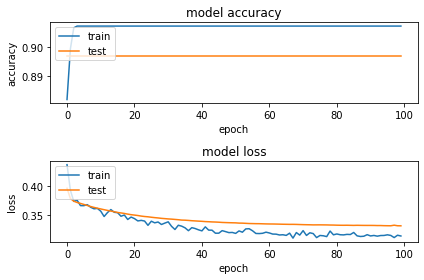

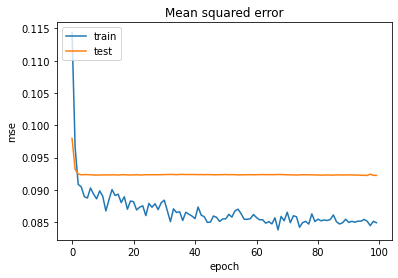

In [ ]:

import numpy as np
import pandas as pd
import math
from tensorflow import keras
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from keras.layers import Dense, Activation, Flatten, Convolution1D, Convolution2D, Dropout, MaxPooling1D,LSTM
import os
import tensorflow as tf
from keras.regularizers import l2
import warnings
import matplotlib.pyplot as plt
import random as rnd
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import shuffle
import matplotlib.pyplot as plt


'''
            ------- Amazon and Best Buy Electronics -------
This dataset presents the feedback received on the different electronic products.
The whole idea is to create neural networks predict 
Having been given different features, We want to predict weather a given brand is recommended (reviews.doRecommend = True) or a brand is not recommened (reviews.doRecommend = False)
'''

# Conditions to make sure that tensorflow GPU is up and running on machine.
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

# Reading the dataset from the csv file using panadas.
dataset = pd.read_csv('DatafinitiElectronicsProductData.csv')

# Printing the first 5 rows of the dataset
print(dataset.head())


# Creating the dataset with the needed columns.
# add  'reviews.rating' for a better accuracy.
new_dataset = dataset.filter(['brand', 'categories', 'manufacturerNumber', 'manufacturer', 'reviews.numHelpful', 'reviews.doRecommend' ], axis = 1)

# Dataset Util.
# Creating pyPlots.
# Data analysis.

def removeNanFromRecommendedReviews(dataset):
    return dataset.dropna()

new_dataset = removeNanFromRecommendedReviews(new_dataset)

print(new_dataset.head())


def getAllTheDifferentBrands(dataset):
    brands = set(dataset['brand'])

    return brands

print("All the brands that have been reviewed at least once.")
print(getAllTheDifferentBrands(new_dataset))

def countAllTrueByBrand(dataset,givenBrand):
    counterTrue = 0
    contor = 1
    ''' NOT WORKING CORECTLY '''
    for row in dataset['brand']:
        contor = contor + 1
        if str(row) == givenBrand:
            print(str(dataset['reviews.doRecommend'][contor]))
            if str(dataset['reviews.doRecommend'][contor]) == True:
                counterTrue = counterTrue + 1
    return counterTrue

print("Number of positive reviews each brand has recieve:")
brands = getAllTheDifferentBrands(new_dataset)
#for brand in getAllTheDifferentBrands(new_dataset):
    #print(countAllTrueByBrand(new_dataset,brand))


def countAllFalseByBrand(dataset,givenBrand):
    counterFalse = 0
    ''' NOT WORKING CORECTLY '''
    for row in dataset:
        if str(row['brand']) == givenBrand:
            if row['reviews.doRecommend'] == True:
                counterFalse = counterFalse + 1

    return counterFalse



# Number of true's and false's in all the dataset.
def trueFalsePyData(dataset):
    counterTrue = 0
    counterFalse = 0

    for rowValue in dataset['reviews.doRecommend']:
        if rowValue == True:
            counterTrue = counterTrue + 1
        else:
            counterFalse = counterFalse + 1
    return counterTrue,counterFalse

print(trueFalsePyData(new_dataset))

def trueFalseCounterDataPlot(dataset):
    fig = plt.figure()
    ''' NOT WORKING FULLY '''
    ax = fig.add_axes([0, 0, 1, 1])
    trueFalse = ['Positive Review - TRUE', 'Negative Review - FALSE']
    counters = trueFalsePyData(dataset)
    ax.bar(trueFalse, counters)
    plt.show()

trueFalseCounterDataPlot(new_dataset)


# Number of true's by brand.
def trueBasedOnBrandPlot(dataset):
    plt.figure(figsize=(10, 4))
    plt.hlines(y=dataset['brands'], xmin=0, xmax=CountAllTrueByBrand(dataset,dataset['brands']), color='slateblue')
    plt.plot(dataset[''], dataset['brands'], 'o', color='slateblue')
    plt.title('Continents by area', fontsize=27)
    plt.xlabel('Area, mln km2', fontsize=19)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(0, None)
    plt.tick_params(left=False)
    #sns.despine(left=True)
    plt.show()

def falseBasedOnBrand(dataset):
    pass


def prepare_inputs(X_train, X_test):

    oe = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=100)
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)

    return X_train_enc, X_test_enc

def prepare_targets(y_train, y_test):

    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)

    return y_train_enc, y_test_enc


def plot(history):
    """
    Se creeaza numeroase grafice pe modelul retelei neuronale creat,
    :param history: reprezinta modelul retelei neuronale artificiale.
    :return: grafic pentru accuratetea atat pentru valorile de antrenare cat si cele de testare.
             grafic pentru functia de pierdere atat pentru valorile de antrenare cat si cele de testare.
             grafic pentru eroarea patratica medie atat pentru valorile de antrenare cat si cele de testare.
    Pe aceste grafice se poate vedea foarte usor daca modelul retelei neuronale este eficace sau nu.
    """
    plt.figure(1)

    plt.subplot(211)
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.subplot(212)
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.tight_layout()

    plt.show()

    plt.plot(history.history['mse'])
    plt.plot(history.history['val_mse'])
    plt.title('Mean squared error')
    plt.ylabel('mse')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


X = new_dataset.drop('reviews.doRecommend', axis = 1)
Y = new_dataset['reviews.doRecommend']


print(X)
print(Y)

# Splitting the dataset in train and test data with train_test_split from sklearn.model_selection
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

X_train,X_test = prepare_inputs(X_train,X_test)
Y_train, Y_test = prepare_targets(Y_train, Y_test)

print(X_train)
print(len(Y_train))
# Neural Network model with sckit-Learn lib ALGOS.

logreg_clf = LogisticRegression()
logreg_clf.fit(X_train, Y_train)


logreg_clf.predict(X_test)

score = logreg_clf.score(X_test, Y_test)
print("Accuracy Score with Sklearn LogisticRegression Algorithm")
print(score)



# Neural Network model from scratch with keras lib.

model = Sequential()

# model.add(Convolution1D(filters=2, kernel_size=1, padding='SAME', activation='sigmoid'))
model.add(Flatten(input_shape=(5,)))
# model.add(Dense(24, activation='relu', kernel_regularizer=l2(0.02), bias_regularizer=l2(0.02), kernel_initializer='LecunNormal', bias_initializer='zeros'))
# model.add(Dropout(0.2))
model.add(Dense(5, activation='sigmoid', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(0.2))
#model.add(Dense(15, activation='sigmoid'))
#model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

sgd = tf.keras.optimizers.SGD(learning_rate=0.001, nesterov=True, decay=1e-8, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=["accuracy", "mse", "mae"])

history = model.fit(X_train, Y_train, epochs=100, batch_size=15, verbose='auto', validation_split=0.3, shuffle=True)

# Accuratetea ar putea fi scrisa ca numarul de predictii corecte / numarul total de predictii.
print(history.history.keys())

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save("savedNeuralNetwork")

# Se salveaza modelul neuronal.
reconstructed_model = keras.models.load_model("savedNeuralNetwork")

# Se verifica modelul.
np.testing.assert_allclose(model.predict(X_test), reconstructed_model.predict(X_test))

# Modelul reconstruit este deja compilat si a retinut optimizatorul
# Antrenamentul se poată relua:
reconstructed_model.fit(X_test, Y_test)

print(model.summary())

plot(history)

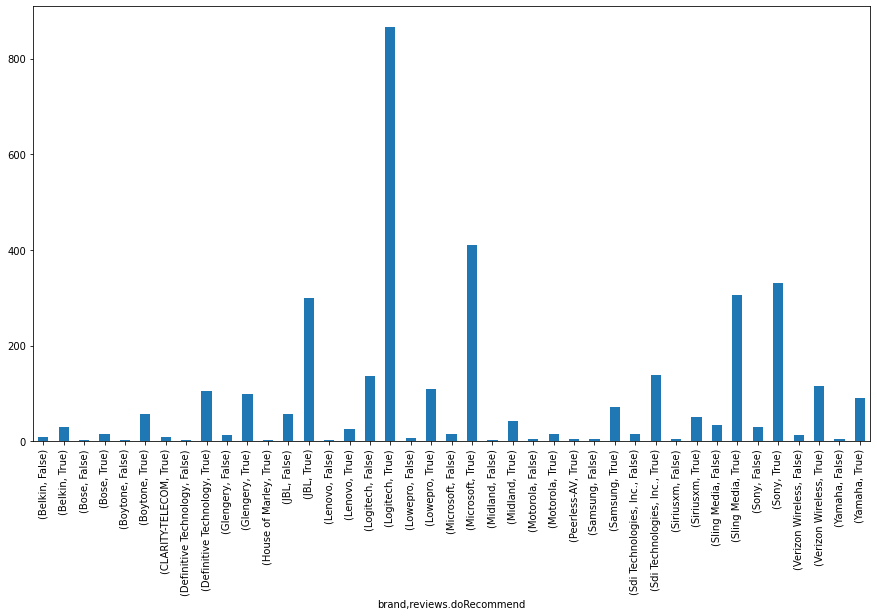

In [ ]:
new_dataset.head()
brands = new_dataset.groupby(['brand','reviews.doRecommend'])
brands['brand'].count().plot(kind="bar",figsize=(15,8))

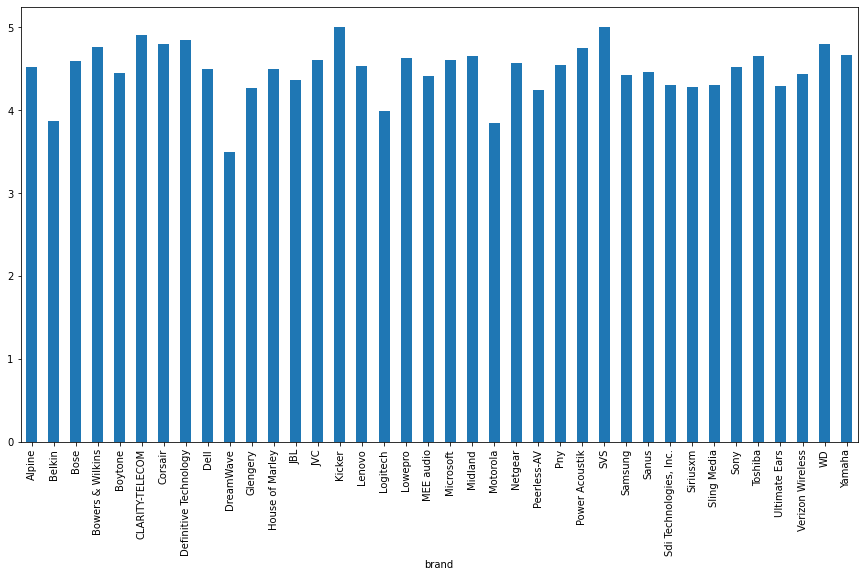

In [ ]:
dataset.groupby(['brand'])['reviews.rating'].mean().plot(kind="bar",figsize=(15,8))
